**Importing the libraries**

In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

**Importing the datasets**

In [2]:
data=pd.read_csv('/content/car data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.shape

(301, 9)

In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
#check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Data Visualization**

Text(0.5, 1.0, 'Scatterplot of Present price and Selling price')

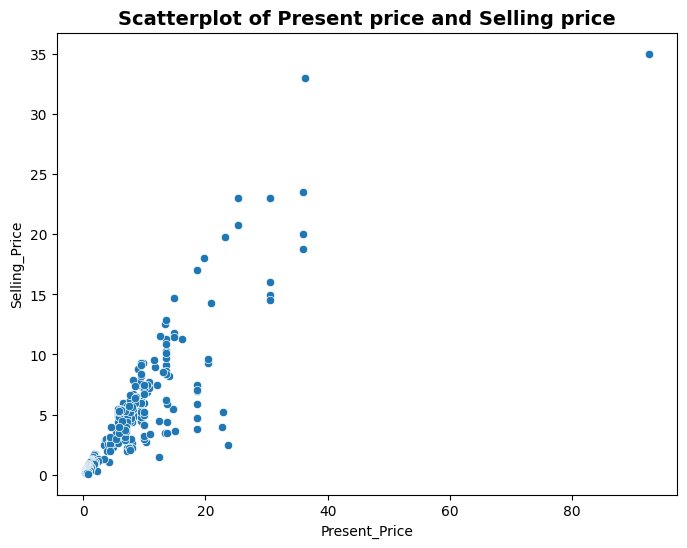

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Present_Price', y='Selling_Price')
plt.title("Scatterplot of Present price and Selling price",fontsize=14,fontweight='bold')

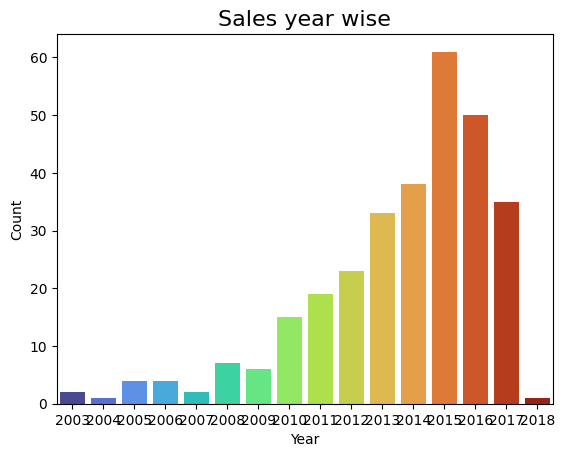

In [10]:
year=data['Year'].value_counts()
plt.title("Sales year wise",fontsize=16,fontweight=50)
sns.barplot(x=year.index,y=year,palette='turbo')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [11]:
#Label encoding
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

**Regression Model**

In [12]:
#Setting target
X=data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [13]:
#Train, test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
#Prediction of the test data
lr_pred=lr.predict(X_test)

In [15]:
#Test score
print(f'The Test_accuracy: {lr.score(X_test,y_test)*100:.2f}')

The Test_accuracy: 84.65


In [16]:
#mean_squared_error and r2_score
mse=mean_squared_error(y_test,lr_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,lr_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,lr_pred)))

Root_mean_squred_error LinearRegression 1.8807
R2_score LinearRegression 0.846454
mean_absolute_error LinearRegression 1.214733
